In [104]:
# Importing all the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

%matplotlib inline

## 1. Data Collection and Cleaning

####            Fixtures Dataset

In [56]:
# Loading all the Fixtures data

Fixtures = pd.read_csv('./data/Fixtures.csv')
Fixtures.head()

,Unnamed: 0,0,1,2,3,4
0,0,Round,Date,Match,Time(IST),Venue
1,1,Round 1,"16 October, Sunday",Sri Lanka vs Namibia,3:00 PM,"Kardinia Park Stadium, Geelong"
2,2,Round 1,"16 October, Sunday",Qualifier 2 vs Qualifier 3,7:00 PM,"Kardinia Park Stadium, Geelong"
3,3,Round 1,"17 October, Monday",West Indies vs Scotland,3:00 PM,"Bellerive Oval, Hobart"
4,4,Round 1,"17 October, Monday",Qualifier 1 vs Qualifier 4,7:00 PM,"Bellerive Oval, Hobart"


In [57]:
# Renaming the Indexes

Fixtures.columns = Fixtures.iloc[0]
Fixtures = Fixtures[1:]

# Formating the data into more useful form
Fixtures[['Team1','Team2']] = Fixtures.Match.str.split(r" vs | VS ",expand=True)
Fixtures[['Stadium','City']] = Fixtures.Venue.str.split(", ",expand=True)
Fixtures.drop(['Match','Venue','Time(IST)'],axis=1,inplace=True)
Fixtures = Fixtures.reindex(['Round','Date','Team1','Team2','Stadium','City'],axis=1)

Fixtures.head()

,Round,Date,Team1,Team2,Stadium,City
1,Round 1,"16 October, Sunday",Sri Lanka,Namibia,Kardinia Park Stadium,Geelong
2,Round 1,"16 October, Sunday",Qualifier 2,Qualifier 3,Kardinia Park Stadium,Geelong
3,Round 1,"17 October, Monday",West Indies,Scotland,Bellerive Oval,Hobart
4,Round 1,"17 October, Monday",Qualifier 1,Qualifier 4,Bellerive Oval,Hobart
5,Round 1,"18 October, Tuesday",Namibia,Qualifier 3,Kardinia Park Stadium,Geelong


#### Ratings Dataset

In [58]:
# Ratings Data

ratings = pd.read_csv('./data/Ratings.csv')
ratings

,Unnamed: 0,Pos,Team T,Matches M,Points P,Rating R,Bat Avg,Bowl Avg
0,0,1,India IND,55,14760,268,24.69,24.35
1,1,2,England ENG,42,11063,263,18.24,21.57
2,2,3,South Africa SA,37,9544,258,20.83,14.59
3,3,4,Pakistan PAK,46,11838,257,19.33,16.43
4,4,5,New Zealand NZ,42,10657,254,24.39,18.45
5,5,6,Australia AUS,42,10554,251,20.42,15.97
6,6,7,West Indies WI,48,11494,239,19.10,20.20
7,7,8,Sri Lanka SL,42,9964,237,15.31,19.83
8,8,9,Bangladesh BAN,45,10013,223,14.81,20.09
9,9,10,Afghanistan AFG,27,5919,219,17.47,14.17


In [59]:
# Foramting the data

ratings.drop('Unnamed: 0',axis=1,inplace=True)
ratings.columns = ['Rank','Team','Matches','Points','Ratings','Bat Avg','Bowl Avg']
ratings[['Team','Ext']] = ratings.Team.str.split('  ',expand=True)
ratings.drop('Ext',axis=1,inplace=True)
ratings.head()

,Rank,Team,Matches,Points,Ratings,Bat Avg,Bowl Avg
0,1,India,55,14760,268,24.69,24.35
1,2,England,42,11063,263,18.24,21.57
2,3,South Africa,37,9544,258,20.83,14.59
3,4,Pakistan,46,11838,257,19.33,16.43
4,5,New Zealand,42,10657,254,24.39,18.45


In [60]:
ratings.count()

Rank        18
Team        18
Matches     18
Points      18
Ratings     18
Bat Avg     18
Bowl Avg    18
dtype: int64

In [61]:
# Cleaning those teams which are not participating in the World Cup

Q_Teams = ['Australia','Afghanistan','Bangladesh','England', 'India','Namibia',
 'New Zealand', 'Pakistan', 'Scotland','South Africa', 'Sri Lanka', 'West Indies',
 'Ireland', 'UAE','Netherlands', 'Zimbabwe',]
n = 16

for i in range(1,len(ratings['Team'])):
    flag = 0
    for j in range(n):

        if ratings['Team'][i] in Q_Teams[j]:
            flag = 1
            break

    if flag == 0:
        ratings.drop(i,axis=0,inplace=True)

num = [i for i in range(1,n+1)]
ratings.index = num
ratings

,Rank,Team,Matches,Points,Ratings,Bat Avg,Bowl Avg
1,1,India,55,14760,268,24.69,24.35
2,2,England,42,11063,263,18.24,21.57
3,3,South Africa,37,9544,258,20.83,14.59
4,4,Pakistan,46,11838,257,19.33,16.43
5,5,New Zealand,42,10657,254,24.39,18.45
6,6,Australia,42,10554,251,20.42,15.97
7,7,West Indies,48,11494,239,19.10,20.20
8,8,Sri Lanka,42,9964,237,15.31,19.83
9,9,Bangladesh,45,10013,223,14.81,20.09
10,10,Afghanistan,27,5919,219,17.47,14.17


#### Results Dataset

In [62]:
# Results Data
# T20i Results from 2005 to 9 Oct 2022
# This dataset is already Cleaned and Prepared

Results = pd.read_csv('./data/Results.csv')

Results

,Team 1,Team 2,Winner,Ground,Date
0,New Zealand,Australia,Australia,Eden Park,17/02/2005
1,England,Australia,England,The Rose Bowl,13/06/2005
2,South Africa,New Zealand,New Zealand,Wanderers Stadium,21/10/2005
3,Australia,South Africa,Australia,Brisbane Cricket Ground,09/01/2006
4,New Zealand,West Indies,New Zealand,Eden Park,16/02/2006
...,...,...,...,...,...
994,Bangladesh,Pakistan,Pakistan,Hagley Oval,07/10/2022
995,Australia,West Indies,Australia,Brisbane Cricket Ground,07/10/2022
996,New Zealand,Pakistan,Pakistan,Hagley Oval,08/10/2022
997,Australia,England,England,Perth Stadium,09/10/2022


In [63]:
# Droping such data which had no impact on our prediction

Results.drop(['Ground','Date'],axis=1,inplace=True)
Results

,Team 1,Team 2,Winner
0,New Zealand,Australia,Australia
1,England,Australia,England
2,South Africa,New Zealand,New Zealand
3,Australia,South Africa,Australia
4,New Zealand,West Indies,New Zealand
...,...,...,...
994,Bangladesh,Pakistan,Pakistan
995,Australia,West Indies,Australia
996,New Zealand,Pakistan,Pakistan
997,Australia,England,England


#### World Cup 2022 Dataset

In [64]:
# World Cup 2022 Dataset
# This dataset contains all the information about each team like previous titles, win% etc.
# This dataset is also cleaned and prepared.

world_cup = pd.read_csv('./data/World Cup 2022 Dataset.csv')

world_cup.head()

,Team,Appearances,Win%,Titles,Runner up,Semi Finalist
0,West Indies,7,52.86,2,0,2
1,Sri Lanka,7,63.95,1,2,1
2,India,7,63.51,1,1,1
3,Pakistan,7,61.25,1,1,3
4,Australia,7,61.11,1,1,2


#### Player Stats Dataset

In [65]:
# Player Statistics
# This dataset will contain stats of individual players of every team.

player_stats = pd.read_csv('./data/Player Stats.csv')

player_stats

,Name,Matches,Runs,Bat Avg,Wkts,Bowl Avg,Country
0,Afsar Zazai*,2,33,16.50,0,NaN,Afghanistan
1,Azmatullah Omarzai*,14,83,13.83,6,40.33,Afghanistan
2,Darwish Rasooli*,4,34,17.00,0,NaN,Afghanistan
3,Fareed Ahmad*,20,25,NaN,29,19.76,Afghanistan
4,Fazalhaq Farooqi*,14,0,NaN,18,19.78,Afghanistan
...,...,...,...,...,...,...,...
253,R Ngarava*,23,14,7.00,22,30.86,Zimbabwe
254,V M Nyauchi*,2,1,NaN,3,22.00,Zimbabwe
255,M Shumba*,23,320,24.62,4,25.75,Zimbabwe
256,Sikandar Raza*,58,1040,20.00,28,30.61,Zimbabwe


        - We have all our data prepared and cleaned.
        - Now, we can train our models to predict winner.

## 2. Feature Engineering

In [66]:
# We will use a prediction label: winning team will show '1' if Team 1 has won, '2' if Team 2 has won.

teams_data = Results

teams_data.loc[teams_data.Winner == teams_data['Team 1'],'Winning team']=1
teams_data.loc[teams_data.Winner == teams_data['Team 2'], 'Winning team']=2
teams_data.drop('Winning team',axis=1,inplace=True)

teams_data.head()

,Team 1,Team 2,Winner
0,New Zealand,Australia,Australia
1,England,Australia,England
2,South Africa,New Zealand,New Zealand
3,Australia,South Africa,Australia
4,New Zealand,West Indies,New Zealand


## 3. Dataset Splitting

In [67]:
# Dummy Variables
# Converting both teams into continuous variables

final_data = pd.get_dummies(teams_data, prefix=['Team 1','Team 2'], columns=['Team 1','Team 2'])

# Separating x and y sets
x = final_data.drop(['Winner'],axis=1)
y = final_data['Winner']

# Separating train and test sets

x = (x - np.min(x)) / (np.max(x) - np.min(x))
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.30,random_state=42)

d:\Users\iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
d:\Users\iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [68]:
final_data.head()

,Winner,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_England,Team 1_India,Team 1_Ireland,Team 1_Namibia,Team 1_Netherlands,Team 1_New Zealand,...,Team 2_Namibia,Team 2_Netherlands,Team 2_New Zealand,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_United Arab Emirates,Team 2_West Indies,Team 2_Zimbabwe
0,Australia,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,England,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,New Zealand,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Australia,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,New Zealand,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## 4. Training and Evaluation of Models
###  i. Ensemble Methods

##### Random Forest Classifier

In [69]:
rf = RandomForestClassifier(n_estimators=100,max_depth=20,random_state=42)

rf.fit(x_train,y_train)

train_score_rf = rf.score(x_train,y_train)
test_score_rf = rf.score(x_test,y_test)

print("Train Set Accuracy : ", '%.3f'%(train_score_rf))
print("Test Set Accuracy : ", '%.3f'%(test_score_rf))

Train Set Accuracy :  0.701
Test Set Accuracy :  0.550


        - It gives quite a bad accuracy of 0.55

#### Logistic Regression

In [70]:
mL = LogisticRegression()
mL.fit(x_train,y_train)

train_score_mL = mL.score(x_train,y_train)
test_score_mL = mL.score(x_test,y_test)

print("Train Set Accuracy : ", '%.3f'%(train_score_mL))
print("Test Set Accuracy : ", '%.3f'%(test_score_mL))

Train Set Accuracy :  0.691
Test Set Accuracy :  0.593


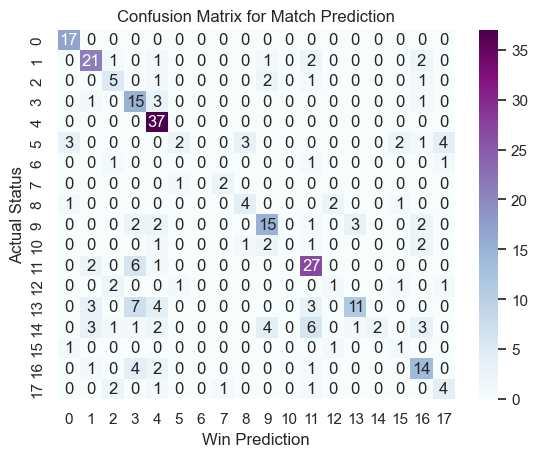

In [71]:
y_pred = mL.predict(x_test)

ConfusionMatrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix for Match Prediction')
ax.set_xlabel('Win Prediction')
ax.set_ylabel('Actual Status')

## Display the visualization of the Confusion Matrix.
plt.show()

In [93]:
#Accuracy from confusion matrix
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

Accuracy from confusion matrix is  0.12666666666666668


#### SVM

In [37]:
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
accuracy = float(cm.diagonal().sum())/len(y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.5733333333333334


#### Gradient Boosting

In [38]:
test_size = 0.30 # taking 70:30 training and test set

seed = 7  # Random number seeding for reapeatability of the code

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [41]:
gb = GradientBoostingClassifier(learning_rate=0.1)

gb.fit(X_train,Y_train)

train_score_gb = gb.score(X_train,Y_train)
test_score_gb = gb.score(X_test,Y_test)

print("Train Set Accuracy : ", '%.3f'%(train_score_gb))
print("Test Set Accuracy : ", '%.3f'%(test_score_gb))

Train Set Accuracy :  0.691
Test Set Accuracy :  0.587


In [43]:
print("Random Forest Classifier     : ",test_score_rf*100)
print("LogisticRegression           : ",test_score_mL*100)
print("Super Vector Machines        : ",accuracy*100) 
print("Gradient Boosting Classifier : ",test_score_gb*100)         

Random Forest Classifier     :  55.00000000000001
LogisticRegression           :  59.333333333333336
Super Vector Machines        :  57.333333333333336
Gradient Boosting Classifier :  58.666666666666664


#### Ensembling Models

In [48]:
# initializing all the model objects with default parameters
xgb = XGBClassifier()

# Making the final model using voting classifier
final_model = VotingClassifier(
	estimators=[('lr', mL), ('xgb', xgb), ('rf', rf), ('svg',classifier)], voting='hard')

final_model.fit(x_train, y_train)

pred_final = final_model.predict(x_test)

train_score = final_model.score(X_train,Y_train)
test_score = final_model.score(X_test,Y_test)

print("Train Set Accuracy : ",(train_score)*100)
print("Test Set Accuracy : ", (test_score)*100)

Train Set Accuracy :  64.52074391988555
Test Set Accuracy :  69.33333333333334


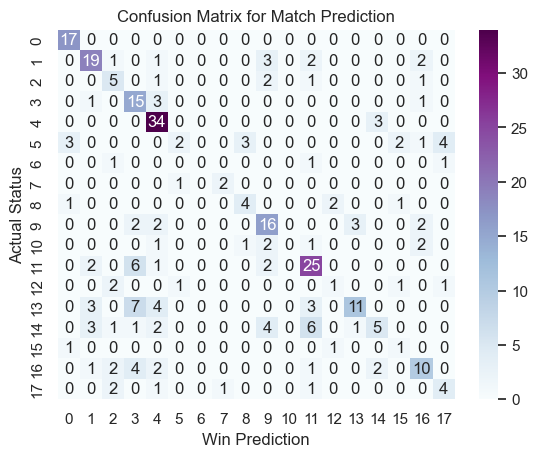

In [94]:
ConfusionMatrix = confusion_matrix(y_test, pred_final)

ax = sns.heatmap(ConfusionMatrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix for Match Prediction')
ax.set_xlabel('Win Prediction')
ax.set_ylabel('Actual Status')

## Display the visualization of the Confusion Matrix.
plt.show()

In [97]:
#Accuracy from confusion matrix
TP= ConfusionMatrix[1,1] #True positive
TN= ConfusionMatrix[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", ((TN+TP)/Total))

Accuracy from confusion matrix is  0.12


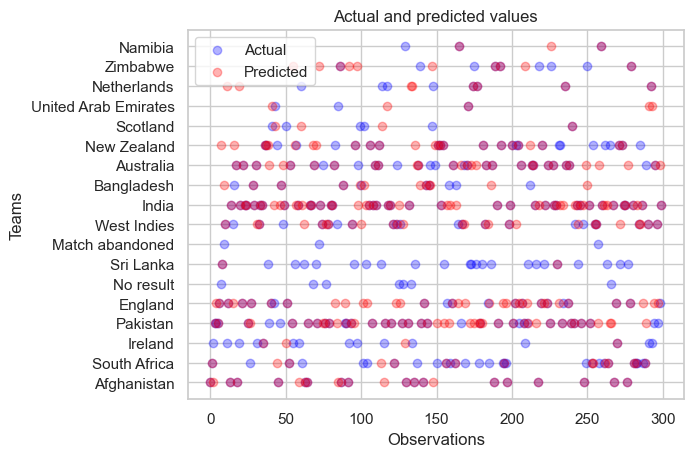

In [99]:
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Teams')
plt.legend()
plt.show()

### ii. Neural Networks

In [107]:
# We will use a prediction label: winning team will show '1' if Team 1 has won, '2' if Team 2 has won.

teams_data = Results

teams_data.loc[teams_data.Winner == teams_data['Team 1'],'Winning team']=1
teams_data.loc[teams_data.Winner == teams_data['Team 2'], 'Winning team']=2
teams_data.drop('Winner',axis=1,inplace=True)

# Dummy Variables
# Converting both teams into continuous variables

temp_final_data = pd.get_dummies(teams_data, prefix=['Team 1','Team 2'], columns=['Team 1','Team 2'])

# Separating x and y sets
x = temp_final_data.drop(['Winning team'],axis=1)
y = temp_final_data['Winning team']

# Separating train and test sets

x = (x - np.min(x)) / (np.max(x) - np.min(x))
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.30,random_state=42)

d:\Users\iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
d:\Users\iqbal\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [109]:
# Define the network model and its arguments. 
# Set the number of neurons/nodes for each layer:
model = Sequential()
model.add(Dense(32, input_shape=(32,),activation='relu'))
model.add(Activation('sigmoid'))
model.add(Activation('linear'))

# Compile the model and calculate its accuracy:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy']) 

# Print a summary of the Keras model:
model.fit(x, y, epochs=200, batch_size=10, verbose=0)

y_pred = model.predict(x_test)

10/10 [==============================] - 0s 2ms/step


In [110]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 59.33


        Conclusion:
            - Approach # 1:
                    Ensemling the models will give more accuracy of 69%.
            - Approach # 2:
                    Using our own simple neural networks are less accurate for about 57%.

### Prediction for all the Fixtures of World Cup
#### Using Ensemble Modeling

In [500]:
# new lsit for prediction
pred_df = []

# We have some undecided teams in Fixtures. Removing those records from Fixtures either in Team1 or Team 2.
for i in range(1,len(Fixtures['Team1'])+1):
    flag = 0
    for j in range(16):

        if Fixtures['Team1'][i] in Q_Teams[j]:
            flag = 1
            break

    if flag == 0:
        Fixtures.drop(i,axis=0,inplace=True)

num = [i for i in range(1,len(Fixtures)+1)]
Fixtures.index = num

for i in range(1,len(Fixtures['Team1'])+1):
    flag = 0
    for j in range(16):

        if Fixtures['Team2'][i] in Q_Teams[j]:
            flag = 1
            break

    if flag == 0:
        Fixtures.drop(i,axis=0,inplace=True)

num = [i for i in range(1,len(Fixtures)+1)]
Fixtures.index = num

Fixtures

,Round,Date,Team1,Team2,Stadium,City
1,Round 1,"16 October, Sunday",Sri Lanka,Namibia,Kardinia Park Stadium,Geelong
2,Round 1,"17 October, Monday",West Indies,Scotland,Bellerive Oval,Hobart
3,Super 12,"22 October, Saturday",New Zealand,Australia,Sydney Cricket Ground,Sydney
4,Super 12,"22 October, Saturday",England,Afghanistan,Perth Stadium. Perth,None
5,Super 12,"23 October, Sunday",India,Pakistan,Melbourne Cricket Ground,Melbourne
...,...,...,...,...,...,...
10,Super 12,"1 November, Tuesday",England,New Zealand,The Gabba,Brisbane
11,Super 12,"2 November, Wednesday",India,Bangladesh,Adelaide Oval,Adelaide
12,Super 12,"3 November, Thursday",Pakistan,South Africa,Sydney Cricket Ground,Sydney
13,Super 12,"4 November, Friday",Australia,Afghanistan,Adelaide Oval,Adelaide


In [501]:
# Creating new columns with ranking positions, batting and bowling averages of each team.

Fixtures.insert(1, 'team1_rank', Fixtures['Team1'].map(ratings.set_index('Team')['Rank']))
Fixtures.insert(2, 'team2_rank', Fixtures['Team2'].map(ratings.set_index('Team')['Rank']))
Fixtures.insert(3, 'team1_bat_avg', Fixtures['Team1'].map(ratings.set_index('Team')['Bat Avg']))
Fixtures.insert(4, 'team2_bat_avg', Fixtures['Team2'].map(ratings.set_index('Team')['Bat Avg']))
Fixtures.insert(5, 'team1_bowl_avg', Fixtures['Team1'].map(ratings.set_index('Team')['Bowl Avg']))
Fixtures.insert(6, 'team2_bowl_avg', Fixtures['Team2'].map(ratings.set_index('Team')['Bowl Avg']))

Fixtures.head()

,Round,team1_rank,team2_rank,team1_bat_avg,team2_bat_avg,team1_bowl_avg,team2_bowl_avg,Date,Team1,Team2,Stadium,City
1,Round 1,8,14,15.31,17.91,19.83,15.63,"16 October, Sunday",Sri Lanka,Namibia,Kardinia Park Stadium,Geelong
2,Round 1,7,15,19.10,14.42,20.20,21.81,"17 October, Monday",West Indies,Scotland,Bellerive Oval,Hobart
3,Super 12,5,6,24.39,20.42,18.45,15.97,"22 October, Saturday",New Zealand,Australia,Sydney Cricket Ground,Sydney
4,Super 12,2,10,18.24,17.47,21.57,14.17,"22 October, Saturday",England,Afghanistan,Perth Stadium. Perth,None
5,Super 12,1,4,24.69,19.33,24.35,16.43,"23 October, Sunday",India,Pakistan,Melbourne Cricket Ground,Melbourne


In [502]:
# Now adding all the teams to the new prediction list based on the rakings.

for i, record in Fixtures.iterrows():
    if record['team1_rank'] < record['team2_rank'] and record['team1_bat_avg'] > record['team2_bat_avg'] and record['team1_bowl_avg'] < record['team2_bowl_avg']:
        pred_df.append({'Team 1':record['Team1'] , 'Team 2':record['Team2'], 'Winning Team':None})
    else:
        pred_df.append({'Team 1':record['Team2'] , 'Team 2':record['Team1'], 'Winning Team':None})

pred_df = pd.DataFrame(pred_df)
temp_pred = pred_df
pred_df

,Team 1,Team 2,Winning Team
0,Namibia,Sri Lanka,None
1,West Indies,Scotland,None
2,Australia,New Zealand,None
3,Afghanistan,England,None
4,Pakistan,India,None
...,...,...,...
9,New Zealand,England,None
10,Bangladesh,India,None
11,South Africa,Pakistan,None
12,Afghanistan,Australia,None


In [503]:
# Get dummy variables and drop winning_team column
pred_df = pd.get_dummies(pred_df, prefix=['Team 1', 'Team 2'], columns=['Team 1', 'Team 2'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final_data.columns) - set(pred_df.columns)

for c in missing_cols:
    pred_df[c] = 0
pred_df = pred_df[final_data.columns]


pred_df = pred_df.drop(['Winner'], axis=1)
pred_df.head()

,Team 1_Afghanistan,Team 1_Australia,Team 1_Bangladesh,Team 1_England,Team 1_India,Team 1_Ireland,Team 1_Namibia,Team 1_Netherlands,Team 1_New Zealand,Team 1_Pakistan,...,Team 2_Namibia,Team 2_Netherlands,Team 2_New Zealand,Team 2_Pakistan,Team 2_Scotland,Team 2_South Africa,Team 2_Sri Lanka,Team 2_United Arab Emirates,Team 2_West Indies,Team 2_Zimbabwe
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [506]:
predictions = final_model.predict(pred_df)

for i in range(1,Fixtures.shape[0]):
    print(temp_pred.iloc[i, 1] + " and " + temp_pred.iloc[i, 0])
    if predictions[i] == 1:
        print("Winner: " + temp_pred.iloc[i, 1])
    
    else:
        print("Winner: " + temp_pred.iloc[i, 0])
    print("")

Scotland and West Indies
Winner: West Indies

New Zealand and Australia
Winner: Australia

England and Afghanistan
Winner: Afghanistan

India and Pakistan
Winner: Pakistan

New Zealand and Afghanistan
Winner: Afghanistan

Bangladesh and South Africa
Winner: South Africa

England and Australia
Winner: Australia

India and South Africa
Winner: South Africa

England and New Zealand
Winner: New Zealand

India and Bangladesh
Winner: Bangladesh

Pakistan and South Africa
Winner: South Africa

Australia and Afghanistan
Winner: Afghanistan

Bangladesh and Pakistan
Winner: Pakistan

